# Cardio Disease Classification

## Imports and read form csv:

In [510]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
df = pd.read_csv('data/data.csv')


## Basic info:

In [511]:
df.shape

(70000, 14)

In [512]:
df.head()

,id,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [513]:
df.tail()

,id,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,52.712329,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,61.920548,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,52.235616,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,61.454795,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,56.273973,1,170,72.0,120,80,2,1,0,0,1,0


In [514]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age_days     70000 non-null  int64  
 2   age_year     70000 non-null  float64
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 7.5 MB


In [515]:
df.isna().sum()

id             0
age_days       0
age_year       0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

There are no null values!  
And all the values are numeric.

## Preproces Data:

### We can see that there are some unnecessary columns, so we can throw them

In [516]:
df.drop(['id'], axis = 1, inplace= True)
df['age_year'] = df['age_year'].round(0)
df['weight'] = df['weight'].round(0)


df

,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,48.0,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,53.0,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,62.0,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,52.0,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,61.0,1,163,72.0,135,80,1,2,0,0,0,1


## Visualization:

### Lets see how the data split between the class

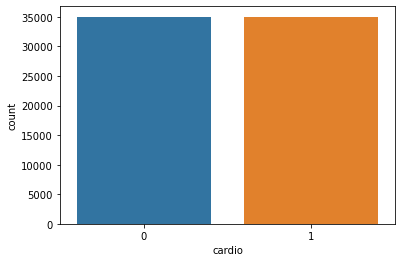

In [517]:
sns.countplot(df['cardio']) # count the number of patients with or witout cardio.

### The number of patients is divided almost equally!

### Now lats correlation between features:

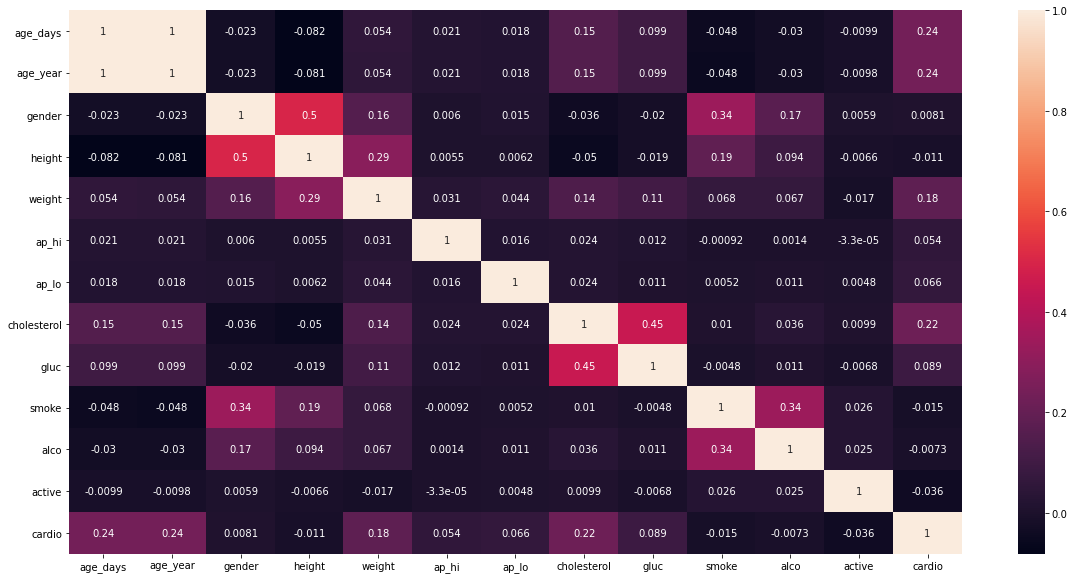

In [518]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

### At first glance we can't find strong correlation between features

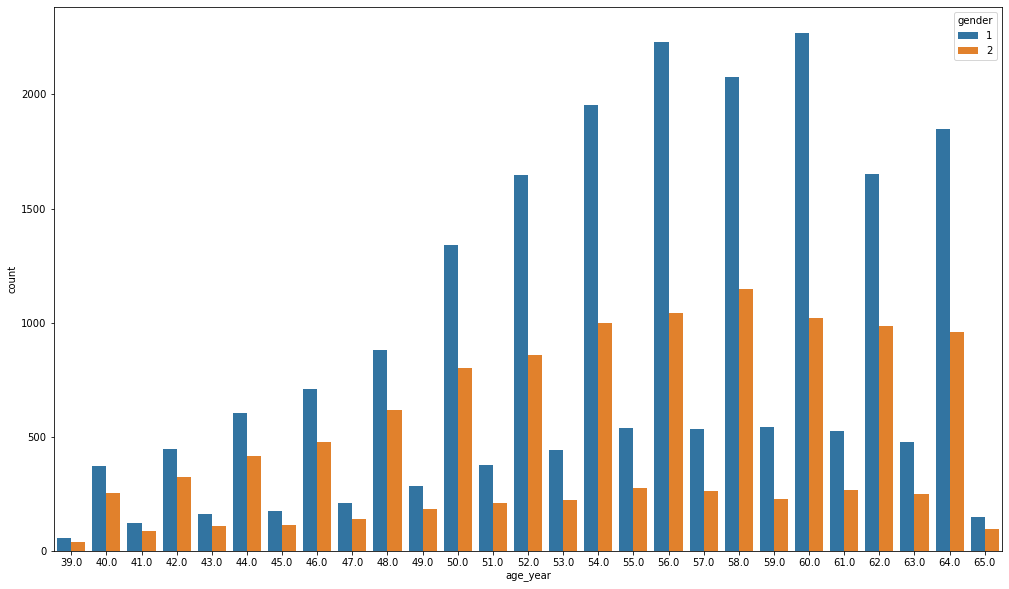

In [519]:
plt.figure(figsize=(17,10))
sns.countplot(data = df[(df['cardio'] == 1)], x='age_year' ,hue='gender')
plt.show()

In [520]:
df.drop(['age_year'], axis = 1, inplace= True)
# df.drop(['height'], axis = 1, inplace= True)
# df.drop(['weight'], axis = 1, inplace= True)

## model:

In [521]:
# Split Data
y = df['cardio']
x = df.drop(['cardio'], axis =1)

#split x and y to trin and test
x_train , x_test , y_train , y_test = split(x,y ,train_size = 0.8 , shuffle = True , random_state = 1)

#scal data
scal_x_train = pd.DataFrame(StandardScaler().fit(x_train).transform(x_train),columns=x.columns)
scal_x_test = pd.DataFrame(StandardScaler().fit(x_train).transform(x_test),columns=x.columns)

In [527]:
KNN = KNeighborsClassifier(n_neighbors=100).fit(scal_x_train, y_train)
RF = RandomForestClassifier(n_estimators=10).fit(scal_x_train, y_train)
Dummy = LogisticRegression().fit(scal_x_train, y_train)

In [528]:
print("RandomForestClassifier R^2: {:.2f}%".format(RF.score(scal_x_test, y_test)*100))
print("KNeighborsClassifier R^2: {:.2f}%".format(KNN.score(scal_x_test, y_test)*100))
print("DummyClassifier R^2: {:.2f}%".format(Dummy.score(scal_x_test, y_test)*100))

RandomForestClassifier R^2: 70.37%
KNeighborsClassifier R^2: 66.61%
DummyClassifier R^2: 72.31%


In [524]:
x_train

,age_days,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
57050,20275,1,156,73.0,120,80,2,1,0,0,1
66119,19628,2,172,78.0,150,100,1,1,1,1,1
2762,22066,1,157,60.0,100,60,2,1,0,0,1
6182,19626,2,168,75.0,120,80,1,1,0,0,1
35804,21884,2,166,64.0,150,90,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
49100,21289,2,175,78.0,120,80,1,1,0,0,1
20609,19116,1,164,68.0,120,80,1,1,0,0,0
21440,18049,2,178,82.0,120,80,1,1,0,0,1
50057,21957,1,169,77.0,120,80,1,1,0,0,0
